<img src="http://inostix.com/blog/wp-content/uploads/2014/01/iquit.jpg"/>


*That is the last thing a company wants to hear from their employees. In a sense, it’s the employees who make the company. It’s the employees who do the work. It’s the employees who shape the company’s culture. Long-term success, a healthy work environment, and high employee retention are all signs of a successful company. But when a company experiences a high rate of employee turnover, then something is going wrong. This can lead the company to huge monetary losses by these innovative and valuable employees.* 

*Companies that maintain a healthy organization and culture are always a good sign of future prosperity. Recognizing and understanding what factors that were associated with employee turnover will allow companies and individuals to limit this from happening and may even increase employee productivity and growth. These predictive insights give managers the opportunity to take corrective steps to build and preserve their successful business. *


**My goal is to understand what factors contribute most to employee turnover and create a model that can predict if a certain employee will leave the company or not.**

*I’ll be following a typical data science pipeline, which is I call “OSEMN” (pronounced awesome).*

1. **O**btaining the required data is the first approach in solving the problem. I would have to download the dataset from Kaggle’s website and import it as a csv file to my working environment.

2. **S**crubbing or cleaning the data is the next step. This includes data imputation of missing or invalid data and fixing column names.

3. **E**xploring the data with exploratory data analysis will follow right after and allow further insight of what our dataset contains. Looking for any outliers or weird data. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix. The creation or removing of features through the use of feature engineering is a possibility. The use of various graphs plays a significant role here as well because it will give us a visual representation of how the variables interact with one another. We will get to see whether some variables have a linear or non-linear relationship. Taking the time to examine and understand our dataset will then give us the suggestions on what type of predictive model to use. 

4. **M**odeling the data will give us our predictive power on whether an employee will leave. Types of models to use could be RF, SVM, LM, GBM, etc. Cross validation is used here, which will be used to examine the model’s accuracy and tune the model’s hyperparameters if necessary. After predicting any uncertainties, optimization is next. Feature selection from RandomForest could be used as well. A confusion matrix gives the precision of the model with the number of True Positives and True Negatives. We can graph this with a ROC curve. Understand the reasoning behind choosing the right model for this problem. 

5. I**N**terpreting the data is last. With all the results and analysis of the data, what conclusion is made? What factors contributed most to employee turnover? What relationship of variables were found? If the model’s accuracy is too high from our test set, a chance of overfitting is likely. Ways to prevent overfitting include: collecting more data, choosing simpler models, cross validation, regularization, use of ensemble methods, or better parameter tuning. Give a brief overview of the feature importance that affected our model. How can we improve our model in the future? After a prediction, this is the opportunity to gain more insight about our features and ask more questions. Which subsets of the data are most impactful to the prediction? What features were the bad ones that did not help with the model? What makes features made good predictions?**

**Note:** *The data was found from the “Human Resources Analytics” dataset provided by Kaggle’s website. https://www.kaggle.com/ludobenistant/hr-analytics*


# <font color='red'>Part 1: Obtaining the Data </font>

In [26]:
# Import the neccessary modules for data manipulation and visual representation
%matplotlib inline
import pandas as pd
import seaborn as sns

In [27]:
#Read the analytics csv file and store our dataset into a dataframe called "df"
df = pd.DataFrame.from_csv('C:/Users/Randy/Documents/SpringBoard Capstone Project 1/HR Analytics/HR_comma_sep.csv', index_col=None)

# <font color='red'>Part 2: Scrubbing the Data </font>

*Typically, cleaning the data requires a lot of work and can be a very tedious procedure. This dataset from Kaggle is super clean and contains no missing values. But still, I will have to examine the dataset to make sure that everything else is readable and that the observation values match the feature names appropriately.*

In [6]:
# Check to see if there are any missing values in our data set
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [185]:
# Get a quick overview of what we are dealing with in our dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### <font color='red'> 2a. Labeling </font>
*Something that I normally do when look at my data is to make sure that the column names are easy to read. This process is known as labeling. Labeling your column names appropriately and periodically is the best way for you to understand the problem because it lets you see what features you get to work with and it encourages potential feature development. Like the saying goes, "Garbage in, Garbage out".*

### Lookup Table for Department and Salary values:
#### Department: 
*{0} Sales **/** {1} Accounting **/** {2} HR **/** {3} Technical **/** {4} Support **/** {5} Management **/** {6} IT **/** {7} Product_Mng **/** {8} Marketing **/** {9} RandD*
#### Salary:
*{0} Low / {1} Medium / {2} High*

In [28]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })


### <font color='red'> 2b. Feature Conversion </font>

Since the 'department' and 'salary' features are categorical, I'm going to convert it into numeric values for better analysis.

In [29]:
# Convert "department" and "salary" features to numeric types because some functions won't be able to work with string types
df['department'].replace(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], inplace = True)
df['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [5]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']
df.drop(labels=['turnover'], axis=1,inplace = True)
df.insert(0, 'turnover', front)
df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,0,0
1,1,0.80,0.86,5,262,6,0,0,0,1
2,1,0.11,0.88,7,272,4,0,0,0,1
3,1,0.72,0.87,5,223,5,0,0,0,0
4,1,0.37,0.52,2,159,3,0,0,0,0


# <font color='red'>Part 3 - Exploratory Data Analysis</font>

### <font color='red'> 3a. Statistical Overview </font>


In [188]:
# The dataset contains 10 columns and 14999 observations
df.shape

(14999, 10)

In [189]:
# Check the type of our features. 
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department               int64
salary                   int64
dtype: object

In [190]:
# Looks like about 76% of employees stayed and 24% of employees left. 
# NOTE: When performing cross validation, its important to maintain this turnover ratio
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [191]:
# Overview of summary
# On average, employees who left had a lower satisfaction level of -20%**, worked 8hours more per month, 
# had lower salary, and had a lower promotion rate
turnover_Summary = df.groupby('turnover')
turnover_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
turnover,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,3.408908,0.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,3.118734,0.414730


In [192]:
# Display the statistical overview of the employees
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,3.339823,0.594706
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,2.820837,0.637183
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,3.000000,1.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,9.000000,2.000000


### <font color='red'> 3b. Correlation Matrix & Heatmap</font>
##### Highly correlated features:
    1. (+) projectCount & averageMonthlyHours & evaluation
    2. (-) turnover & satisfaction & salary
*From the heatmap, there seems to be heavy **positive(+)** correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly. But the feature evaluation, when compared independently with the response variable turnover, shows little to no relationship. What does this mean? For the **negative(-)** relationships, turnover, satisfaction, and salary are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied and are lowly paid. *

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,-0.043814,-0.157898
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,0.015413,0.050022
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.011855,-0.013002
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.005577,-0.001803
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,-0.002387,-0.002242
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,-0.001611,0.048715
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,0.019215,0.009247
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,0.015170,0.098119
department,-0.043814,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,0.015170,1.000000,0.033415
salary,-0.157898,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,0.098119,0.033415,1.000000


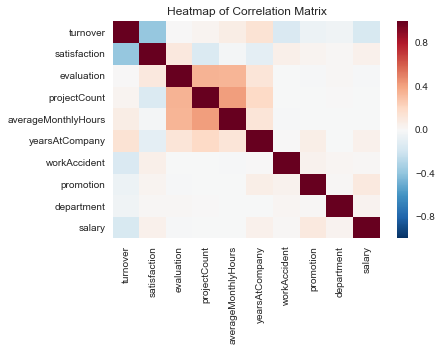

In [193]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')
corr

### <font color='red'> 3c. Turnover V.S. Department </font>
**Summary: **
*Looks like the top three departments for the company are support, technical, and sales.*
*Most of the departments have similar turnover rates, but management has the lowest. This could mean that people with a higher position tend to not leave.*


*The management department has the highest salary ratio and lowest turnover rate.*

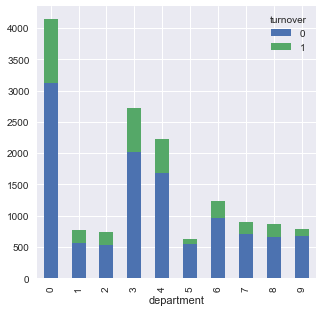

In [194]:
#Department   V.S.   Turnover
clarity_color_table = pd.crosstab(index=df["department"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

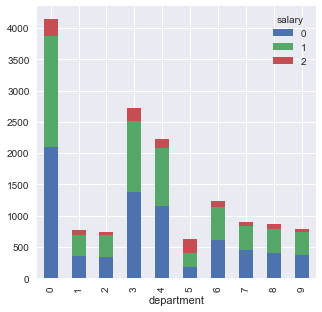

In [195]:
#Department   V.S.   Salary
clarity_color_table = pd.crosstab(index=df["department"], 
                          columns=df["salary"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

### <font color='red'> 3d. Turnover V.S. Salary </font>
**Summary:**
*This is a very interesting observation. Almost all of the employees who turnovered came from **low** to **medium** salary levels. Barely anybody that had a **high** salary left the company*

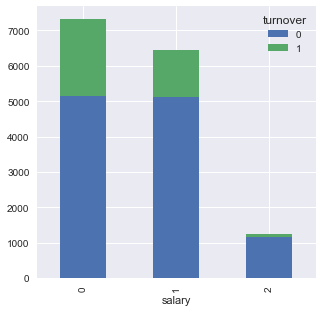

In [49]:
#Salary   V.S.   Turnover
clarity_color_table = pd.crosstab(index=df["salary"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

### <font color='red'> 3e. Turnover V.S. Promotion </font>

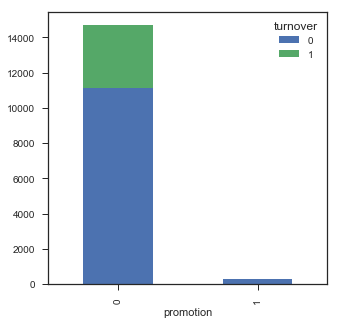

In [20]:
#Promotion   V.S.   Turnover
clarity_color_table = pd.crosstab(index=df["promotion"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

### <font color='red'> 3f. Turnover V.S. YearsAtCompany </font>

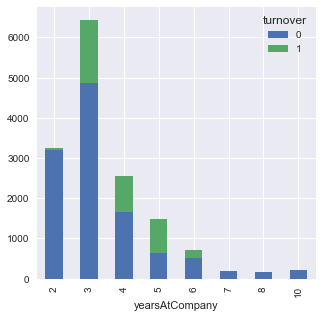

In [73]:
#YearsAtCompany   V.S.   Turnover
clarity_color_table = pd.crosstab(index=df["yearsAtCompany"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

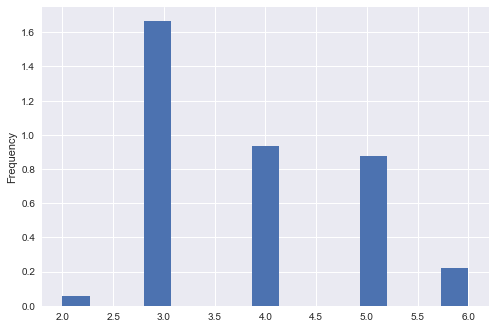

In [92]:
df.loc[(df['turnover'] == 1),'yearsAtCompany'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

### <font color='red'> 3g. Turnover V.S. ProjectCount </font>
**Summary:** *This graph is quite interesting as well. More than half of the employees that only had 2 projects left the company. Same can be said with employees who had project counts from 6-7. Maybe this means that employees with project counts 2 or less are not worked enough or are not highly valued, thus leaving the company? And maybe employees with 6+ projects are getting overworked, thus leaving the company?*

It looks like a majority of the employes who left only had two projects. Also, you can see an increase in turnover as the number of projects increase. 3 Projects seems to be the sweet spot.

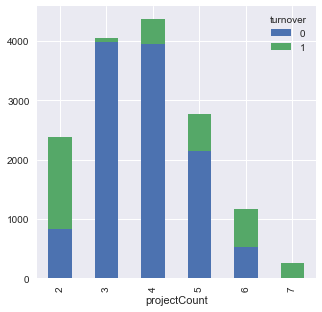

In [197]:
#projectCount V.S. turnover
clarity_color_table = pd.crosstab(index=df["projectCount"], 
                          columns=df["turnover"])

clarity_color_table.plot(kind="bar", 
                 figsize=(5,5),
                 stacked=True)

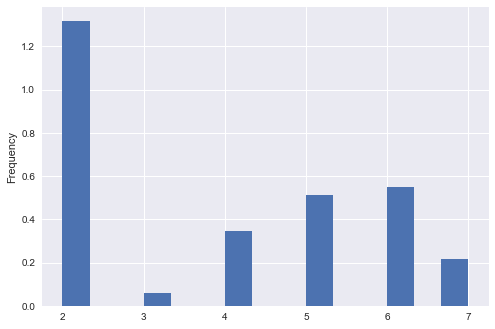

In [6]:
# Here is a histogram that shows the frequency of people who left the company and the amount of projects they had.
# It looks like a majority of the employes who left only had two projects
# Also, you can see an increase in turnover as the number of projects increase. 
# 3 Projects seems to be the sweet spot.
df.loc[(df['turnover'] == 1),'projectCount'].plot(kind='hist', normed=1, bins=15, stacked=False, alpha=1)

### <font color='red'> 3h. Turnover V.S. Evaluation </font>
**Summary:** *There seems to be a biomodal distrubtion for those that had a turnover. It looks like employees who performed bad or performed well left the company. The sweet spot seems for those that stayed seems to be within 0.6-0.8.

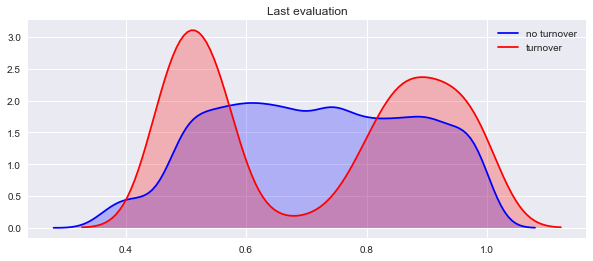

In [201]:
fig = plt.figure(figsize=(10,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Last evaluation')

### <font color='red'> 3i. Turnover V.S. AverageMonthlyHours </font>
**Summary:** *Another noticeable bi-modal distrubtion for employees that turnovered. It looks like employees who had less hours of work (~150hours or less) and employees who had too many hours of work (~250 or more) left the company. Meaning that employees who left generally were not underworked or overworked.


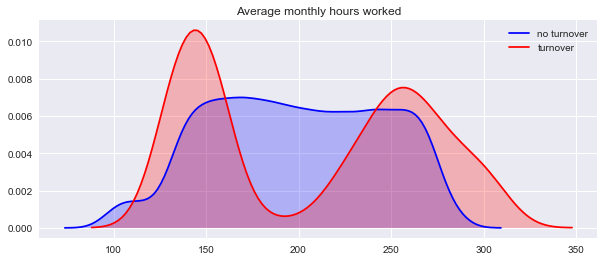

In [206]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(10,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Average monthly hours worked')

### <font color='red'> 3j. ProjectCount VS AverageMonthlyHours </font>


**Interesting Notice:**
Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. 
Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects.
In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects.

**Questions to think about:** What could be the meaning for this? Why is it that employees who left worked more hours than employees who didn't, even with the same project count?

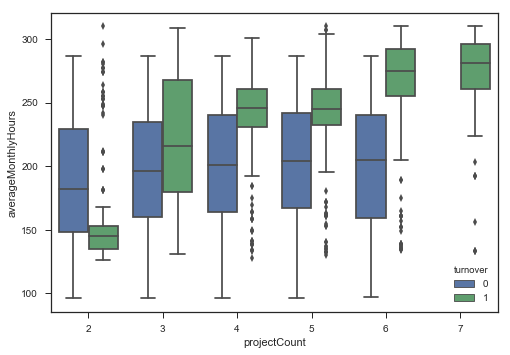

In [15]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

### <font color='red'> 3k. ProjectCount VS Evaluation </font>

**Interesting Notice:** This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There seems to be an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts. 

**Questions to think about:** Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? Shouldn't employees with lower evaluations tend to leave the company more? 

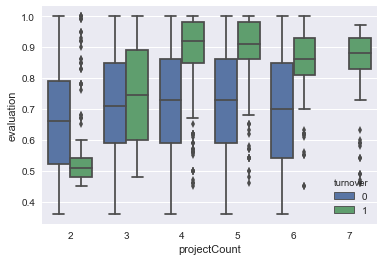

In [12]:
#ProjectCount VS Evaluation
#Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts
#There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 
#Employees that had two projects and a horrible evaluation left. Employees with more than 3 projects and super high evaluations left
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

### <font color='red'> 3l. ProjectCount VS Evaluation VS Satisfaction [SCATTER MATRIX]</font>

**Interesting Notice:** On the bottom left hand corner of the matrix (Evaluation VS Satisfaction)
From the scatter matrix, you can see that there are three distinct clusters for Evluation VS Satisfaction. 

**Possible Feature Engineering?**

*Cluster 1:* Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job. What could be the reason for feeling so horrible when you are highly evaluated? Could it be working too hard? Could this cluster mean employees who are "overworked"?

*Cluster 2:* Satisfaction between about 0.35~0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work. Which could mean that employees in this cluster were not performing as well and felt bad. Could this cluster mean employees who "under-performed"?

*Cluster 3:* Satisfaction between 0.7~1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance. Maybe employees in this category left because they found another job opportunity?

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190A157BA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000190A29931D0>]], dtype=object)

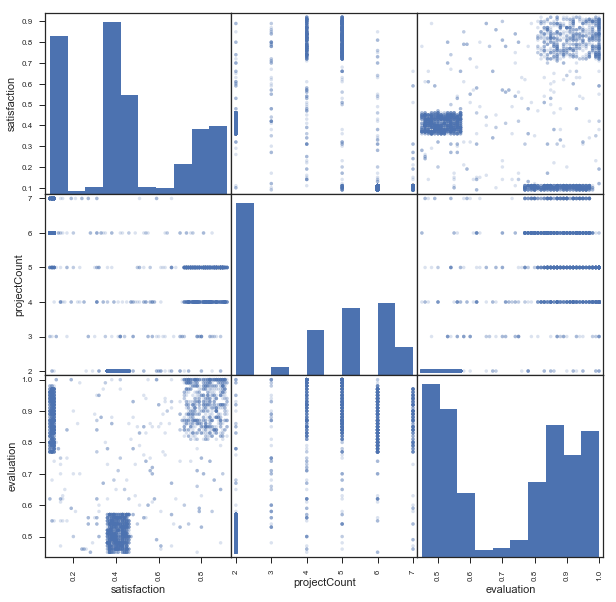

In [30]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

# SCATTER MATRIX FOR EMPLOYEES WHO TURNOVER
fig, ax = plt.subplots(figsize=(10,10))
turnoverDF = df[df['turnover']==1]
scatter_matrix(turnoverDF[['satisfaction','projectCount','evaluation']], alpha=0.2, diagonal='hist', ax=ax)

# <font color='red'>Part 4: Modeling the Data </font>

In [161]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = df.pop('turnover')
data_train, data_test, label_train, label_test = train_test_split(df, label, test_size = 0.2, random_state = 15)

In [162]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(data_train, label_train)
lg_score_train = lg.score(data_train, label_train)
print("Training score: ",lg_score_train)
lg_score_test = lg.score(data_test, label_test)
print("Testing score: ",lg_score_test)

Training score:  0.788565713809
Testing score:  0.787333333333


In [172]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(data_train, label_train)
svm_score_train = svm.score(data_train, label_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(data_test, label_test)
print("Testing score: ",svm_score_test)

Training score:  0.960080006667
Testing score:  0.955333333333


In [173]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, label_train)
knn_score_train = knn.score(data_train, label_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(data_test, label_test)
print("Testing score: ",knn_score_test)

Training score:  0.954412867739
Testing score:  0.940666666667


In [174]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  0.998166513876
Testing score:  0.99


# <font color='red'>Part 5: Interpreting the Data </font>

**Brief Summary of Employee Turnover:**
1. Employees leave when working ~6hours/day (underworked) and ~10hours/day (overworked)
2. Majority of employees that left had LOW-MEDIUM salary
3. Majority of employees that left did not get promoted
4. Majority of employees who left had evaluation scores below 0.6 and above 0.8
5. As the project count increased, so did the turnover rate. Majority of employees who left had 2 project. Every employee with 7 projects left. Project count of 3 seemed to be the sweet spot of having the least amount of turnovers.

**Can you find some trends?:**
1. ProjectCount, Average Monthly Hours, and Evaluation had a POSITIVE correlation with each other. Meaning the more you worked the higher evaluation you get.
2. Turnover, Satisfaction, and Salary had a NEGATIVE correlation with each other. Meaning the lower satisfaction and salary yielded a higher turnover rate.

**Questions for Consideration:**
    1. What happens when we lose employees?
    2. Why does satisfaction affect turnover the most?
    3. What contributes to higher satisfaction? Lower satisfaction?
    4. Why was there so little promotions?
    5. Why is it that employees who left worked more hours than employees who didn't, even with the same amount of projects?
    6. Why is it that employees who left, had on average, a higher evaluation than employees who did not leave, even with an increase in project count? Shouldn't employees with lower evaluations tend to leave the company more?

**Quotes:** 
1. "Clients do not come first. Employees come first. If you take care of your employees, they will take care of the clients" - Richard Branson
2. "You don't build a business. You build people, and people build the business" - Zig Ziglar

In [110]:
import pandas_profiling

ModuleNotFoundError: No module named 'pandas_profiling'